The LMR database of Common ERA records includes data in the PAGES2k phases 2 and 3 compilations as well as additional records collected from NCDC.


In [433]:
%matplotlib inline

import os
import cPickle
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

figdir = 'Figs/'

proxy_pandas_metafile = 'NCDC_v0.1.0all_Metadata.df.pckl'
proxy_pandas_datafile = 'NCDC_v0.1.0all_Proxies.df.pckl'

proxy_meta = pd.read_pickle(proxy_pandas_metafile)
proxy_data = pd.read_pickle(proxy_pandas_datafile)
lat = proxy_meta['Lat (N)'].values
lon = proxy_meta['Lon (E)'].values
oldest = proxy_meta['Oldest (C.E.)'].values




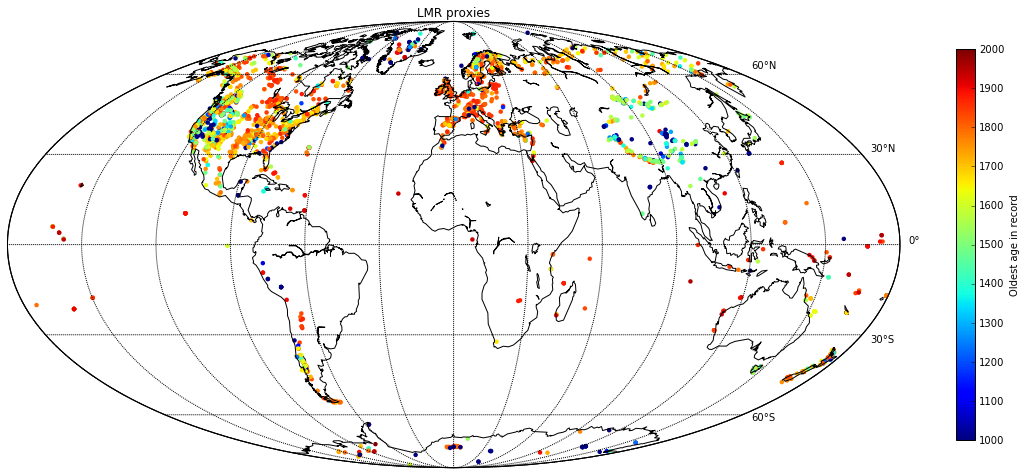

In [4]:
plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = m(lon,lat)
sc = plt.scatter(x,y, c=oldest,edgecolors='none',vmin=1000, vmax =2000, cmap='jet', s=20)
cbar = plt.colorbar(sc, shrink = .7)
cbar.set_label('Oldest age in record')
m.drawcoastlines()
plt.title('LMR proxies')
plt.show();

This figure of the PAGES2k data from Saenger shows more marine records:


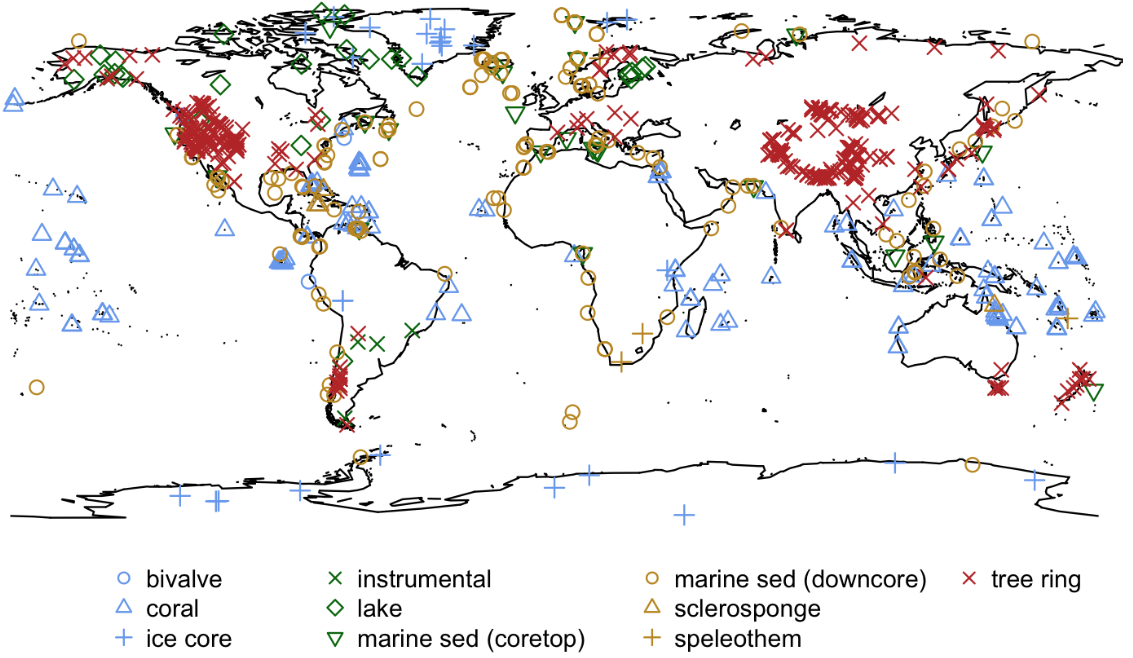

In [166]:
from IPython.display import Image
Image(filename = "pages2kfromsaenger.png")


These are records spanning between 1750 and 1900 with annual resolution. They are mostly from tree rings.

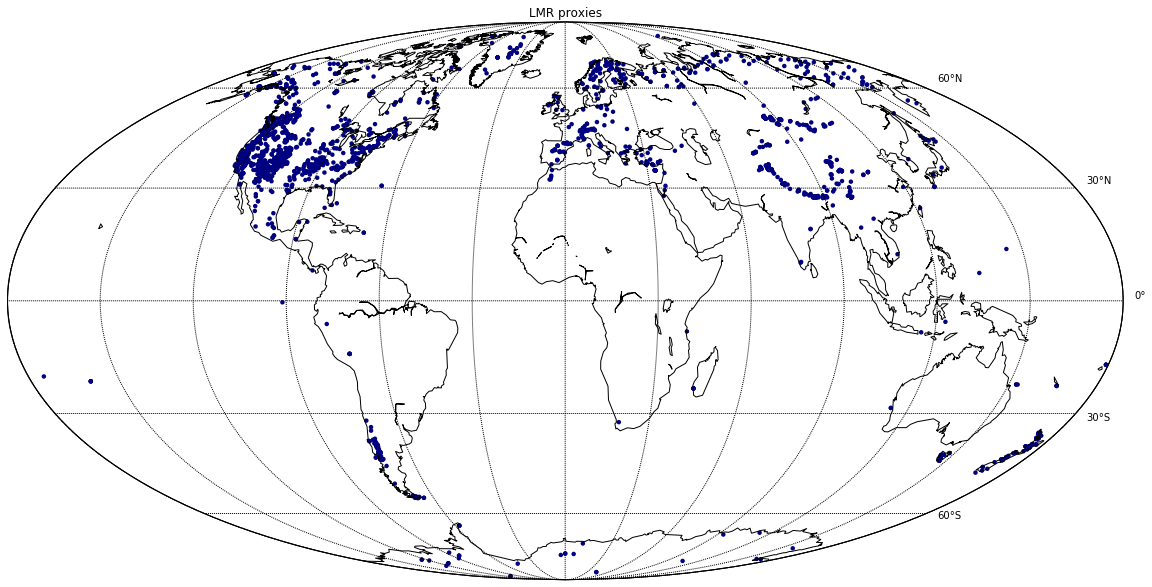

In [231]:
# Find annually resolved records spanning between 1700 and 1900. Where are they? How many are there?
#y17 = (proxy_meta['Oldest (C.E.)']<1700).tolist and  (proxy_meta['Youngest (C.E.)']>1900).tolist

pm2 = proxy_meta[(proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1)]

lat2 = pm2['Lat (N)'].values
lon2 = pm2['Lon (E)'].values
res2 = pm2['Resolution (yr)'].values
oldest2 = pm2['Oldest (C.E.)'].values

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = m(lon2,lat2)
sc = plt.scatter(x,y, c=res2,edgecolors='none',vmin=1, vmax =10, cmap='jet', s=20)
#cbar = plt.colorbar(sc, shrink = .7)
#cbar.set_label('Sampling interval (years)')
m.drawcoastlines()
plt.title('LMR proxies')
plt.show();

/Users/dan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:30: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



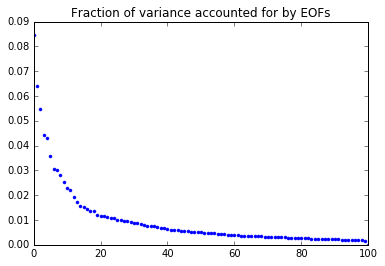

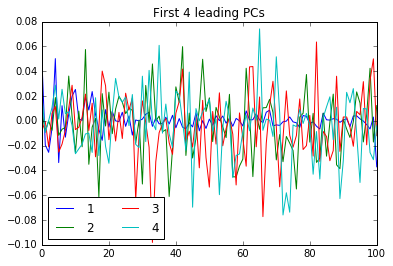

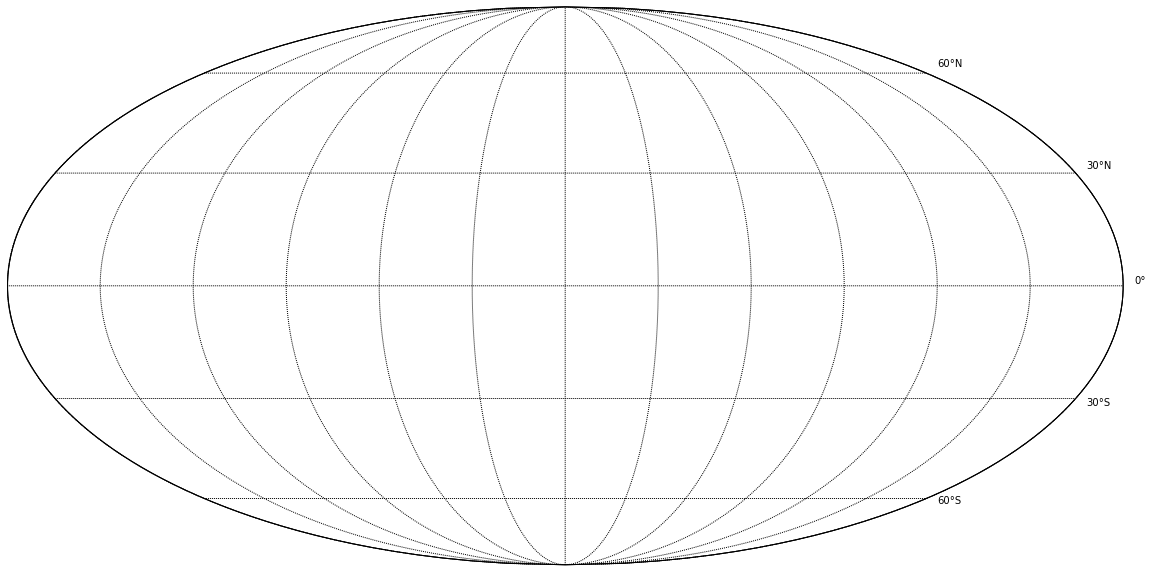

In [420]:
##### EOFs of just the normalized data over an interval (no averaging)

# Pick out records that meet some coverage criteria
# For now, I want records with annual resolution with coverage between 1800 and 1900 (2000?)
# Decide later whether to eliminate records that don't span the duration

# Establish some criteria from the meta data for which records are included

# interpolated proxy data matching the criteria. It's a little wider at first in case that helps with interpolation
#pdc = proxy_data[critc].loc[1750:1950].interpolate()
pd_wider = proxy_data.loc[1750:1950].interpolate()

# sort the metadata to have the same order as the data file
proxy_meta2 = proxy_meta[proxy_data.columns]

# Narrowing down the time range of interpolated data. Still has nans
pd_nans = pdwider.loc[1800:1900]


notnan = ~pdcs.isnull().any()
res1 = proxy_meta['Resolution (yr)']==1
tokeep = notnan&res1

# Eliminate any records with NaNs at this point
pm3 = pm3[tokeep]
p = pdcs.dropna(axis=1,how='any')

# Normalize
pn = (p - p.mean())/p.std()

#  Compute SVD
U, s, V = np.linalg.svd(pn.values, full_matrices=False)

# Plot the fraction of variance accounted for by EOFs
#plt.plot(np.cumsum(np.square(s)/np.sum(np.square(s))),'.')
plt.plot((np.square(s)/np.sum(np.square(s))),'.');
plt.title('Fraction of variance accounted for by EOFs')
plt.show()

# Plot the first 4 leading PCs
plt.plot(V[:,0:4])
plt.legend('12345',loc=3,ncol=2)
plt.title('First 4 leading PCs')
plt.show()

# Make the singular vectors into dataframes
#Udf = pd.DataFrame(U,pn.index)
#Vdf = pd.DataFrame(V,range(1,102),pn.columns)

# Plot the leading left SV

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')


#site_list = list(pdc.columns.values)
## Loop over sites
#for site in site_list:
#site = site_list[1]
#d = pdc[site].interpolate()
#y = d.index
#dv = d.values
## For every column, grab the times and data when there are no NaNs
#yd = y[pd.notnull(d)]
#dd = d[pd.notnull(d)]
## If there are data at every time, go on
## Otherwise, interpolate the data linearly to the missing times
## If there are still missing data within some age range (due to edge effects), eliminate the record
## Put the record and its metadata into new dataframes


#    site_meta = proxy_meta[proxy_meta['NCDC ID'] == site]
#    lon_s = site_meta['Lon (E)'].iloc[0]
#    lat_s = site_meta['Lat (N)'].iloc[0]
#    proxy_meta_g4.set_value(site,'lat_ind',4)




In [39]:
# Syntax notes

# Gives a df of records matching the crit and the year range
#test = proxy_data[pd.DataFrame(np.transpose(crit))].loc[1800:2000]

# Gives a matrix of records matching the crit and the year range
# test = proxy_data[pd.DataFrame(crit)]#.values[1800:2000]

# syntax: df['column name' or dataframe of column names].values[start:end]

In [4]:
# Append grid location information to the data metafile

# Define a grid
RES = 4;
lon_g = np.linspace(0,360,num=360/RES +1)
lat_g = np.linspace(-90,90,num=180/RES +1)

# Define a new metadata file that has grid coordinates for this resolution choice
proxy_meta_g4 = proxy_meta;

proxy_meta_g4['lat_ind'] = np.ones(len(proxy_meta_g4['NCDC ID']))*np.nan
proxy_meta_g4['lon_ind'] = np.ones(len(proxy_meta_g4['NCDC ID']))*np.nan

## Determine lat_ind and lon_ind for every record

# List of proxy sites
site_list = list(proxy_data.columns.values)

for index, row in proxy_meta_g4.iterrows():
    lon_s = row['Lon (E)']
    lat_s = row['Lat (N)']
    lat_ind = np.digitize(lat_s,lat_g,right=True)
    lon_ind = np.digitize(lon_s,lon_g,right=True)
    proxy_meta_g4.set_value(index,'lat_ind',lat_ind)
    proxy_meta_g4.set_value(index,'lon_ind',lon_ind)



In [33]:
# Spatial averaging

# initialize gridded average field

G = np.nan*np.ones([len(lat_g)-1,len(lon_g)-1])

# Loop over grid lat
for ii in range(1,len(lat_g)):
    # Loop over grid lon
    for jj in range(1,len(lon_g)-1):
        ii


# Normalize records
# Average within the grid
# SVD of gridded data

In [ ]:
# What about for different (smoothed?) box averaging?
# What about for different regions?

In [ ]:
##### EOFs of just the normalized data over an interval (no averaging)

# Pick out records that meet some coverage criteria
# For now, I want records with annual resolution with coverage between 1800 and 1900 (2000?)
# Decide later whether to eliminate records that don't span the duration

# Establish some criteria from the meta data for which records are included

proxy_meta.index=proxy_meta['NCDC ID']

crit = (proxy_meta['Oldest (C.E.)']<1800)\
                  & (proxy_meta['Youngest (C.E.)']>1900)\
                  & (proxy_meta['Resolution (yr)']==1);

pm3 = proxy_meta[crit];

# List of sites meeting criteria
critc = proxy_data.columns[crit]

# interpolated proxy data matching the criteria. It's a little wider at first in case that helps with interpolation
#pdc = proxy_data[critc].loc[1750:1950].interpolate()
pdc = proxy_data.loc[1750:1950].interpolate()

# Narrowing down the time range of interpolated data
pdcs = pdc.loc[1800:1900]

notnan = ~pdcs.isnull().any()
res1 = proxy_meta['Resolution (yr)']==1
tokeep = notnan&res1

# Eliminate any records with NaNs at this point
pm3 = pm3[tokeep]
p = pdcs.dropna(axis=1,how='any')

# Normalize
pn = (p - p.mean())/p.std()

#  Compute SVD
U, s, V = np.linalg.svd(pn.values, full_matrices=False)

# Plot the fraction of variance accounted for by EOFs
#plt.plot(np.cumsum(np.square(s)/np.sum(np.square(s))),'.')
plt.plot((np.square(s)/np.sum(np.square(s))),'.');
plt.title('Fraction of variance accounted for by EOFs')
plt.show()

# Plot the first 4 leading PCs
plt.plot(V[:,0:4])
plt.legend('12345',loc=3,ncol=2)
plt.title('First 4 leading PCs')
plt.show()

# Make the singular vectors into dataframes
#Udf = pd.DataFrame(U,pn.index)
#Vdf = pd.DataFrame(V,range(1,102),pn.columns)

# Plot the leading left SV

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')


#site_list = list(pdc.columns.values)
## Loop over sites
#for site in site_list:
#site = site_list[1]
#d = pdc[site].interpolate()
#y = d.index
#dv = d.values
## For every column, grab the times and data when there are no NaNs
#yd = y[pd.notnull(d)]
#dd = d[pd.notnull(d)]
## If there are data at every time, go on
## Otherwise, interpolate the data linearly to the missing times
## If there are still missing data within some age range (due to edge effects), eliminate the record
## Put the record and its metadata into new dataframes


#    site_meta = proxy_meta[proxy_meta['NCDC ID'] == site]
#    lon_s = site_meta['Lon (E)'].iloc[0]
#    lat_s = site_meta['Lat (N)'].iloc[0]
#    proxy_meta_g4.set_value(site,'lat_ind',4)
